In [1]:
import sys, os
sys.path.insert(0, os.path.abspath(".."))
from init_env import set_project_root
project_root = set_project_root()

In [2]:
import numpy as np
import project.problems.project_problems as functions
import algorithms as algorithms
from optSolver import optSolver

import scipy.io
import matplotlib.pyplot as plt


# Define three class objects required in 'optSolver' and their attributes 

class Problem:
    def __init__(self, name, x0):
        self.name = name
        self.x0 = x0
        self.n = len(x0)
        match name:
            case "quad_10_10":
                self.compute_f = functions.quad_10_10_func
                self.compute_g = functions.quad_10_10_grad
                self.compute_H = functions.quad_10_10_Hess
            case "quad_10_1000":
                self.compute_f = functions.quad_10_1000_func
                self.compute_g = functions.quad_10_1000_grad
                self.compute_H = functions.quad_10_1000_Hess
            case "quad_1000_10":
                self.compute_f = functions.quad_1000_10_func
                self.compute_g = functions.quad_1000_10_grad
                self.compute_H = functions.quad_1000_10_Hess
            case "quad_1000_1000":
                self.compute_f = functions.quad_1000_1000_func
                self.compute_g = functions.quad_1000_1000_grad
                self.compute_H = functions.quad_1000_1000_Hess
            case "quartic_1":
                self.compute_f = functions.quartic_1_func
                self.compute_g = functions.quartic_1_grad
                self.compute_H = functions.quartic_1_Hess
            case "quartic_2":
                self.compute_f = functions.quartic_2_func
                self.compute_g = functions.quartic_2_grad
                self.compute_H = functions.quartic_2_Hess
            case "rosenbrock_2":
                self.compute_f = functions.rosenbrock_2_func
                self.compute_g = functions.rosenbrock_2_grad
                self.compute_H = functions.rosenbrock_2_Hess
            case "rosenbrock_100":
                self.compute_f = functions.rosenbrock_100_func
                self.compute_g = functions.rosenbrock_100_grad
                self.compute_H = functions.rosenbrock_100_Hess
            case "datafit_2":
                self.compute_f = functions.datafit_2_func
                self.compute_g = functions.datafit_2_grad
                self.compute_H = functions.datafit_2_Hess
            case "exponential":
                self.compute_f = functions.exponential_func
                self.compute_g = functions.exponential_grad
                self.compute_H = functions.exponential_Hess
            case "genhumps_5":
                self.compute_f = functions.genhumps_5_func
                self.compute_g = functions.genhumps_5_grad
                self.compute_H = functions.genhumps_5_Hess

            case _:
                raise ValueError("problem not defined!!!")
        
class Method:
    def __init__(self, name, **options):
        self.name = name
        self.options = options
        
class Options:
    def __init__(self,term_tol=1e-6, max_iterations=1e2):
        self.term_tol = term_tol
        self.max_iterations = max_iterations  

def plot_f_vs_iter(history):
    # Plot training and testing accuracy vs gradient evaluations
    plt.figure()
    plt.plot(history['iterations'], history['f'])
    plt.xlabel('iteration')
    plt.ylabel('f')
    plt.title(f'')
    plt.grid()

Number of skipped steps (TRSR1CG): 79
2.0102456190801257


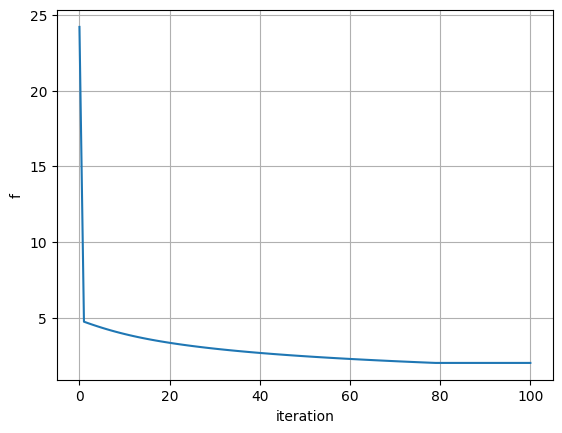

In [3]:
problem = Problem("rosenbrock_2", x0=np.array([-1.2, 1]))
method = Method("TRSR1CG", step_type="Backtracking", alpha=1, tau=0.5,
                c_1_ls=1e-4, c_1_tr=0.8, c_2_tr=0.5, epsilon_sy=1e-8, term_tol_CG=1e-6, )
options = Options(term_tol=1e-6, max_iterations=1e2)

x, f, history = optSolver(problem, method, options)
print(f)
plot_f_vs_iter(history)

Number of skipped steps (GradientDescent): 0
0.001753684655795377


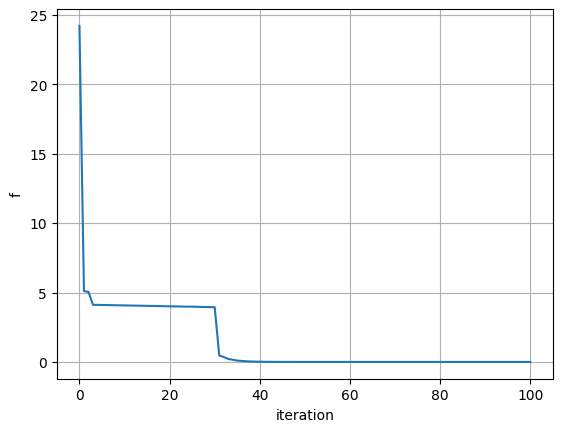

In [16]:
problem = Problem("rosenbrock_2", x0=np.array([-1.2, 1]))
method = Method("GradientDescent", step_type="Wolfe", alpha=1, tau=0.5,
                c_1_ls=1e-4, c_2_ls = 0.9)
options = Options(term_tol=1e-6, max_iterations=1e2)

x, f, history = optSolver(problem, method, options)
print(f)
plot_f_vs_iter(history)

Number of skipped steps (GradientDescent): 0
0.004326904052586884


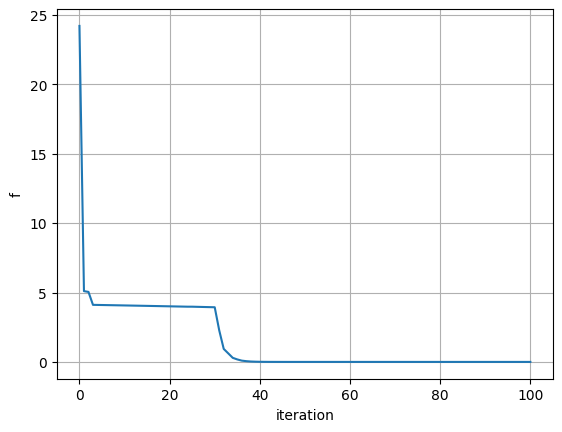

In [8]:
problem = Problem("rosenbrock_2", x0=np.array([-1.2, 1]))
method = Method("GradientDescent", step_type="Backtracking", alpha=1, tau=0.5,
                c_1_ls=1e-4, c_2_ls = 0.9)
options = Options(term_tol=1e-6, max_iterations=1e2)

x, f, history = optSolver(problem, method, options)
print(f)
plot_f_vs_iter(history)